## Calcolo del Calore specifico di Debye in diamante

Nella simulazione si calcola l'integrale di Debye. la stima ''di bassa T'' dipende da una scelta arbitraria dell'limite superiore delle bassa T (dove vale l'approssimazione $T^3$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as P
from scipy import stats
from scipy.integrate import quad

def debint(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2

 
def CD(t):
    integral,err = quad(debint,0.,1/t)
    return 3*integral

T,C = np.transpose(np.loadtxt('diamond.csv',delimiter=','))
# questi sono i dati di KI in due array
C0 = 3.*8.31 # questo è il valore di Dulong&Petit per una mole
c = C/C0 # questi sono i dati normalizzati al valore di D&P



Baro: ho i dati sperimentali e ne estraggo $T_D$, sapendo che l'approssimazione per $T\rightarrow 0$ fornisce

$$C/C0 = \frac {4\pi^4} 5 \left(\frac T {T_D}\right)^3$$

Il modo migliore è una regressione lineare in scala doppio logaritmica

<IPython.core.display.Javascript object>


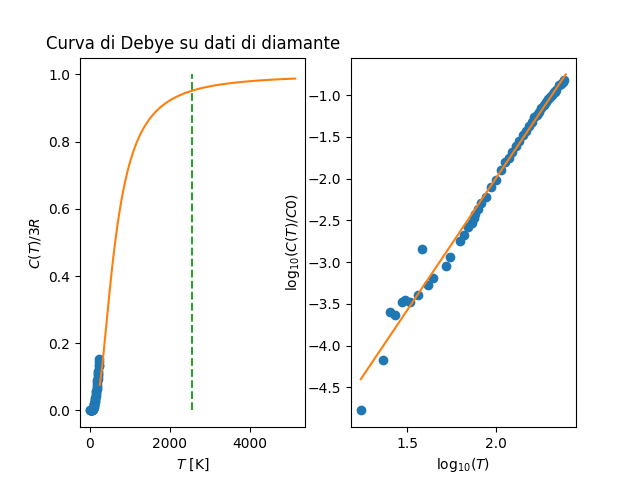

esponente a = 3.17, intercetta b = -8.34, R = 0.993
esponente atteso 3
TD = 2564.2


In [2]:
fig, [ax1,ax2] = P.subplots(1,2)
kmax = 50

ax2.plot(np.log10(T[:kmax]),np.log10(c[:kmax]),'o') # il secondo plot è doppio-logaritmico


a,b,r,p,std = stats.linregress(np.log10(T[:kmax]),np.log10(c[:kmax])) # questa è una regressione lineare
# dei dati sperimentali di bassa temperatura
# per convincersi che da il coefficiente 3 (l'esponente di T**3)
# i coefficienti sono stampati sotto
 
x = np.linspace(np.log10(T).min(),np.log10(T[kmax]),10) 
# una variabile per disegnare rette su scala logaritmica

ax2.plot(x,b+a*x) # questo grafica la retta 

print('esponente a = {:.2f}, intercetta b = {:.2f}, R = {:.3f}'.format(a,b,r))
print('esponente atteso 3')
# il parametro b consente di calcolare la temperatura di Debye
# perchè il fit lineare implica che 10**b = 4/5  pi**4 TD**3
TD = (4./5.*np.pi**4*10.**-b)**(1./3.)
print('TD = {:.1f}'.format(TD))

Eseguo l'integrale con $xx = T/T_D$ compreso tra 0.1 (evito lo zero) e 2 (T=2*TD) 
Noto che $xx = x_D^{-1}$, perchè l'integrale CD ne fa direttamente l'inversoal suo interno per calcolare 
il suo limite superiore.

Siccome $xx$ è un vettore, vettorializzo l'integrale per poterli usare nel grafico.

In [3]:
xx = np.linspace(0.1,2.,101)
# 



ax1.plot(T[:kmax],c[:kmax],'o') # dati normalizzati, pallino rosso
vCD = np.vectorize(CD) 

# disegno la funzione data dall'integrale moltiplicato per 1/xD**3 = (T/TD)**3
ax1.plot(xx*TD,xx**3*vCD(xx),'-') # la variabile indipendente è T/TD*TD = T
ax1.plot([TD,TD],[0,1],'--') # questo è il marker per TD
ax1.set_title('Curva di Debye su dati di diamante')
ax1.set_xlabel(r'$T$ [K]')
ax1.set_ylabel(r'$C(T)/3R$')
ax2.set_xlabel(r'$\log_{10}(T)$')
ax2.set_ylabel(r'$\log_{10}(C(T)/C0)$')

P.show()


In definitiva il calore specifico molare di Debye in 3 D è rappresentato dalla seguente funzione

$$C(T) = 9Nk_B \underbrace{\left(\frac{\hbar \omega_D}{k_B T}\right)^3}_{x_D^{-3}} \int_0^{x_D} \frac {x^4e^x dx}{(e^x-1)^2}  $$